# Linked Structures

## Agenda

1. Motives
2. Objectives
3. Mechanisms

## 1. Motives

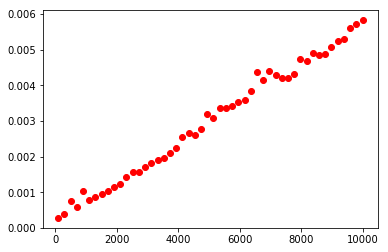

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from timeit import timeit

def time_array_front_insert_delete(n):
    return timeit('lst.insert(0, None) ; del lst[0]',
                  'lst = list(range({}))'.format(n),
                  number=1000)

ns = np.linspace(100, 10000, 50)
plt.plot(ns, [time_array_front_insert_delete(int(n)) for n in ns], 'ro')
plt.show()

In [14]:
# consider:

def concatenate(arr1, arr2):
    """Concatenates the contents of arr1 and arr2 as efficiently (time-wise)
    as possible, so that the resulting structure can be used to index all
    combined elements (arr1's followed by arr2's)."""

    # option 1:
    for x in arr2:
        arr1.append(x)
    return arr1

    # option 2:
    arr1.extend(arr2)
    return arr1

    # option 3:
    return arr1 + arr2

## 2. Objectives

We need a new data storage mechanism for constructing data structures that:

- does not require monolithic, contiguous memory allocation,
- allows individual elements to be flexibly and efficiently reorganized,
- and preserves the ability to locate (e.g., via position) and iterate over elements

## 3. Mechanisms

### 3.1. Two-Element Lists

In [45]:
# data items
i1 = 'lions'
i2 = 'tigers'
i3 = 'bears'
i4 = 'oh, my'

In [46]:
# creating individual "links"
l1 = [i1, None]
l2 = [i2, None]
l3 = [i3, None]
l4 = [i4, None]

In [47]:
# link-ing them together
l1[1]=l2
l2[1]=l3
l3[1]=l4
l4[1]=None

In [29]:
# iteration
l = l1
while l:
    print(l[0])
    l=l[1]

lions
tigers
bears
oh, my


In [30]:
def iter(l):
    while l:
        yield l[0]
        l=l[1]

In [31]:
# prepending
def prepend(l,x):
    return [x,l]

In [33]:
#example
for x in iter(prepend(l1,'whale')):
    print(x)

whale
lions
tigers
bears
oh, my


In [34]:
# insertion
l1[1]=l
l[1]=l2

TypeError: 'NoneType' object does not support item assignment

In [36]:
# deletion (similar to above)
l1[1]=l2
l[1]=None

TypeError: 'NoneType' object does not support item assignment

### 3.2. "Link" objects

In [37]:
class Link:
    def __init__(self, val, next=None):
        self.val = val
        self.next = next

In [52]:
# manually constructing a list
l1 = Link(i1)
l2 = Link(i2)
l3 = Link(i3)
l4 = Link(i4)
l1.next=l2
l2.next=l3
l3.next=l4

In [57]:
print(l1.val)
print(l1.next.next.next.val)

lions
oh, my


In [59]:
#iteration
def _iter_(l):
    while l:
        yield l.val
        l=l.next

In [61]:
for x in _iter_(l3):
    print(x)

bears
oh, my


In [62]:
# iteration based on a recursive pattern
def _iter_(l):
    if l:
        print(l.val)
        _iter_(l.next)

In [63]:
_iter_(l1)

lions
tigers
bears
oh, my


In [64]:
class LinkedList:
    def __init__(self):
        self.head = None
        
    def prepend(self, val):
        self.head = Link(val, self.head)
        
    def __iter__(self):
        cursor = self.head
        while cursor:
            yield cursor.val
            cursor = cursor.next
            
    def __repr__(self):
        return '[' + ', '.join(str(x) for x in self) + ']'

In [67]:
ll=LinkedList()
for x in range(10):
    ll.prepend(x)
print(ll)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [69]:
class BinaryLink:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [72]:
t=BinaryLink(i1)
t.left = BinaryLink(i2)
t.right = BinaryLink(l3)
t.left.left = BinaryLink(i4)

In [ ]:
# manual construction of a "tree"

In [73]:
def tree_iter(root):
    if root:
        yield root.val
        yield from tree_iter(root.left)
        yield from tree_iter(root.right)

In [75]:
for x in tree_iter(t):
    print(x)

lions
tigers
oh, my


In [76]:
class NaryLink:
    def __init__(self, val, n=2):
        self.val = val
        self.children = [None] * n
        
    def __getitem__(self, idx):
        return self.children[idx]
    
    def __setitem__(self, idx, val):
        self.children[idx] = val
        
    def __iter__(self):
        for c in self.children:
            yield c

In [77]:
root = NaryLink('Kingdoms', n=5)

root[0] = NaryLink('Animalia', n=35)
root[1] = NaryLink('Plantae', n=12)
root[2] = NaryLink('Fungi', n=7)
root[3] = NaryLink('Protista', n=5)
root[4] = NaryLink('Monera', n=5)

root[2][0] = NaryLink('Chytridiomycota')
root[2][1] = NaryLink('Blastocladiomycota')
root[2][2] = NaryLink('Glomeromycota')
root[2][3] = NaryLink('Ascomycota')
root[2][4] = NaryLink('Basidiomycota')
root[2][5] = NaryLink('Microsporidia')
root[2][6] = NaryLink('Neocallimastigomycota')

def tree_iter(root):
    if root:
        yield root.val
        for c in root:
            yield from tree_iter(c)

In [78]:
for x in tree_iter(root):
    print(x)

Kingdoms
Animalia
Plantae
Fungi
Chytridiomycota
Blastocladiomycota
Glomeromycota
Ascomycota
Basidiomycota
Microsporidia
Neocallimastigomycota
Protista
Monera
